## Contextually Supervised Source Seperation
The equation below displays this problem where the vector $\bar y$ is observed and each source signal, $y_i$ is unobserved.
\begin{equation}
\bar y = \sum_{i=0}^{k} y_i
\label{eq.cons}
\end{equation}

Contextual separation is achieved by (A) relating each source signal to exogenous observations, and (B) exploiting known regularity in the source signals.
Below we present the general form of this optimization as presented in [P1](http://www.aaai.org/ocs/index.php/AAAI/AAAI14/paper/download/8629/8460). $\ell_i()$ is a cost function to fit the source signal, $y_i$ to the exogenous variables, $X_i$, using a linear transformation with parameters $\theta_i$; $g_i()$ is a regularization term applied to the source signal which would elicit smoothness or other periodic regularity; and $h_i()$ is a regularization term for the parameters $\theta_i$.

\begin{align}
\min_{Y,\theta}\hspace{5mm}& \sum_{i=0}^{k} \{ \ell_i(y_i, X_i \theta_i) + g_i(y_i) + h_i(\theta_i)\}\\
\mbox{s.t.,}\hspace{5mm}&  \bar y = \sum_{i=0}^{k} y_i
\label{general}
\end{align}

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import cvxpy as cvp
import CSSS as CSSS
import time 
%matplotlib inline

In [6]:
## Create an example case where we separate two signals based on sin functions. 
N = 10

X1 = np.sin(np.arange(N)*2*np.pi/N)*50
Y1 = X1 + np.random.normal(0,4,N) + 10


X2 = np.array([5*elem/100+2 for elem in range(0,N)])
Y2 = X2 + np.random.normal(0,5,N)

Y = Y1 + Y2 


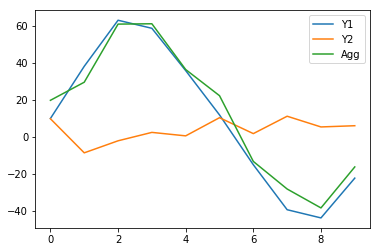

In [7]:
plt.plot(Y1,label='Y1')
plt.plot(Y2,label='Y2')


plt.plot(Y,label='Agg')
plt.legend()

In [14]:
# Try it out. 
CSSEtry = CSSS.CSSS(Y)  ## Instantiate model with aggregate signal, Y
CSSEtry.addSource(np.vstack((np.ones((1,N)),X1)).transpose(), alpha = 1, name = 'Y1')  ## Add a model for Y1
CSSEtry.addSource(X2, alpha = 1, name = 'Y2') ## Add a model for Y2

## Constrain Y2 to be greater than -1 just to try out the constraints. 
#CSSEtry.addConstraint(CSSEtry.models['Y2']['source'] > -10 )
start=time.time()
CSSEtry.constructSolve()
print("It took {} seconds in centralized CSSS".format(time.time()-start))
    


No regularization
No regularization
It took 0.0130949020386 seconds in centralized CSSS


In [15]:
import time
start=time.time()
[dual_obj,norm_resid_equality,u]=CSSEtry.admmSolve(10, MaxIter=100, ABSTOL=0.001, RELTOL=0.01,verbose=True)
print("It took {} seconds in ADMM".format(time.time()-start))

Verbose on
Initialized all sources
('iter_num', 's_norm', 'eps_dual', 'r_norm', 'eps_pri')
(1, 26.130093875683283, 0.053991346421829144, 0.5225929561426026, 0.0017320508075688772)
(2, 18.868887500837417, 0.0917339408077418, 0.3774259438591394, 0.0017320508075688772)
(3, 13.628116724540474, 0.11899436321372651, 0.27260422405989787, 0.0017320508075688772)
(4, 9.851257711560635, 0.13870954597328491, 0.19715182759565064, 0.0017320508075688772)
(5, 7.11548558521457, 0.15291528722135797, 0.1420574124807325, 0.0017320508075688772)
(6, 5.148134283631132, 0.16321009487818453, 0.10294807656828689, 0.0017320508075688772)
(7, 3.704977839301377, 0.17061701513675095, 0.07406920258568811, 0.0017320508075688772)
(8, 2.67825486011565, 0.17598822113940515, 0.053712060026758525, 0.0017320508075688772)
(9, 1.9212157668058796, 0.17981253260632912, 0.03824311466934834, 0.0017320508075688772)
(10, 1.3765316166587203, 0.18251843862224867, 0.027059060159659438, 0.0017320508075688772)
(11, 0.9827188547937514, 0

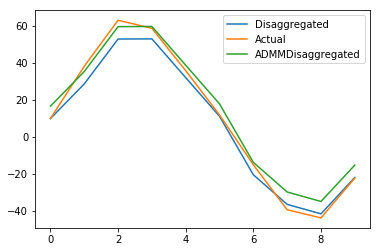

In [10]:
plt.plot(CSSEtry.models['Y1']['source'].value, label = 'Disaggregated')

#plt.plot(CSSEtry.models['Y1']['regressor'] * CSSEtry.models['Y1']['theta'].value, label = 'Modeled')
plt.plot(Y1, label = 'Actual')
plt.plot(CSSEtry.models['Y1']['admmSource'], label = 'ADMMDisaggregated')

plt.legend()
plt.show()

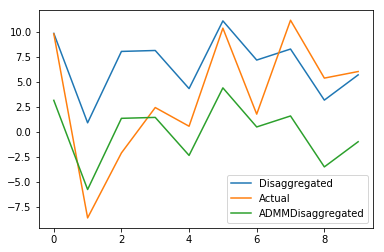

In [11]:
plt.plot(CSSEtry.models['Y2']['source'].value, label = 'Disaggregated')

#plt.plot(CSSEtry.models['Y2']['regressor'] * CSSEtry.models['Y2']['theta'].value, label = 'Modeled')
plt.plot(Y2, label = 'Actual')
plt.plot(CSSEtry.models['Y2']['admmSource'], label = 'ADMMDisaggregated')

plt.legend()
plt.show()

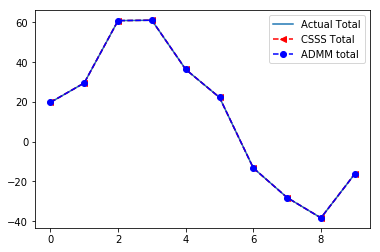

In [12]:
plt.plot(Y, label = 'Actual Total')
plt.plot(CSSEtry.models['Y2']['source'].value+CSSEtry.models['Y1']['source'].value, '--<r',label = 'CSSS Total',)
plt.plot(CSSEtry.models['Y2']['admmSource']+CSSEtry.models['Y1']['admmSource'],'--ob', label = 'ADMM total',)

plt.legend()
plt.show()

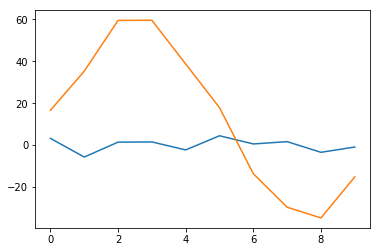

In [13]:
plt.plot(CSSEtry.models['Y2']['admmSource'], label = 'ADMMDisaggregated')
plt.plot(CSSEtry.models['Y1']['admmSource'], label = 'ADMMDisaggregated')
